# Credit Card Fraud Detection - Exploratory Data Analysis

## Objective
Analyze the credit card transaction dataset to understand patterns, class distribution, and feature relationships before building a fraud detection model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

## 1. Load Data

In [4]:
df = pd.read_csv("../../data/raw/creditcard.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


This is a scaled data. This has been PCA tranformed for confidentiality by the authors. The mean is in the order of 10-15. Onlt the Time, Amount and Class Labels are left as it is.

In [ ]:
# Check for missing values
df.isnull().sum().sum()

## 3. Class Distribution

Legitimate: 284315 (99.83%)
Fraudulent: 492 (0.17%)


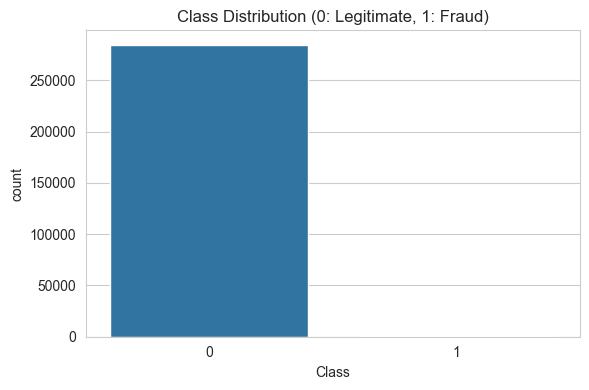

In [5]:
fraud_counts = df["Class"].value_counts()
print(f"Legitimate: {fraud_counts[0]} ({fraud_counts[0]/len(df)*100:.2f}%)")
print(f"Fraudulent: {fraud_counts[1]} ({fraud_counts[1]/len(df)*100:.2f}%)")

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x="Class", data=df, ax=ax)
ax.set_title("Class Distribution (0: Legitimate, 1: Fraud)")
plt.tight_layout()
plt.show()

## 4. Transaction Amount Analysis

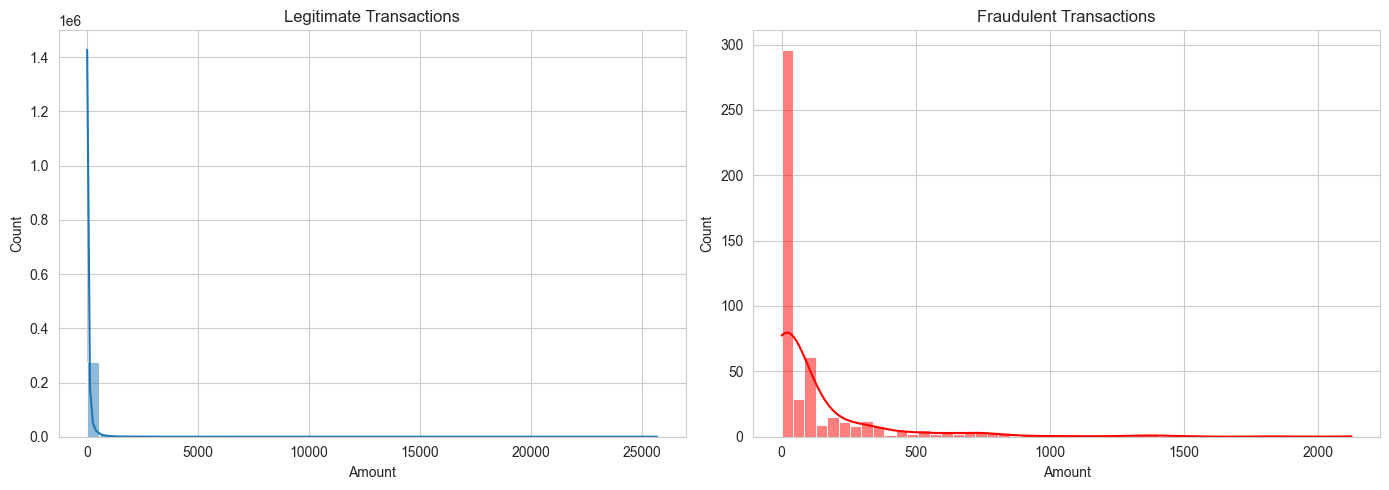

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].set_title("Legitimate Transactions")
sns.histplot(df[df["Class"] == 0]["Amount"], bins=50, ax=axes[0], kde=True)

axes[1].set_title("Fraudulent Transactions")
sns.histplot(df[df["Class"] == 1]["Amount"], bins=50, ax=axes[1], kde=True, color="red")

plt.tight_layout()
plt.show()

Legitimate Transactions(left): Extremely concentrated near to zero with very long tails extending to values ~25000</br>
</br>
Fraud Transactions(right): Tails extending towards ~2000

**A pertinent question to ask: The fraudelent transactions that are happening are they in amount range or nearly 0-2000 ?**

Ths plot fradulent transaction plot, only shows that the most observed fraud cases are occuring in this particular range, however the this doesn't lead to the conclusion that the higher valued transactions cant be fraudulent.
 </br>
If we see the left plot then we know that bulk of the data is lies in ~ 0-2000 range, hence from what we observe in the data most of the fraudulent cases will be concentrated here only.

What we can do is try to see if there is any fraudelent case happening in different amount ranges.



In [14]:
# Fraud Rate by Amount Range
bins = [0, 100, 500, 1000, 2000, 5000, 10000, 30000]
labels = ["(0, 100]", "(100, 500]", "(500, 1000]", "(1000, 2000]", "(2000, 5000]", "(5000, 10000]", "(10000, 30000]"]

df["Amount_Range"] = pd.cut(df["Amount"], bins=bins, labels=labels)

fraud_by_amount = df.groupby("Amount_Range", observed=False).agg(
    Total_Transactions=("Class", "count"),
    Fraud_Count=("Class", "sum")
).reset_index()

fraud_by_amount["Fraud_Rate"] = (fraud_by_amount["Fraud_Count"] / fraud_by_amount["Total_Transactions"] * 100).round(4)
fraud_by_amount["Fraud_Rate"] = fraud_by_amount["Fraud_Rate"].apply(lambda x: f"{x}%")
fraud_by_amount["Total_Transactions"] = fraud_by_amount["Total_Transactions"].apply(lambda x: f"{x:,}")
fraud_by_amount["Fraud_Count"] = fraud_by_amount["Fraud_Count"].astype(int)

df.drop("Amount_Range", axis=1, inplace=True)

print("Fraud Rate by Transaction Amount Range")
print("=" * 55)
fraud_by_amount

Fraud Rate by Transaction Amount Range


,Amount_Range,Total_Transactions,Fraud_Count,Fraud_Rate
0,"(0, 100]","226,474",335,0.1479%
1,"(100, 500]","47,366",95,0.2006%
2,"(500, 1000]","6,202",26,0.4192%
3,"(1000, 2000]","2,264",8,0.3534%
4,"(2000, 5000]",621,1,0.161%
5,"(5000, 10000]",48,0,0.0%
6,"(10000, 30000]",7,0,0.0%


We observe that the majority of the fraud count might be occuring in the 0-100 range however the fraud rate is higher for 500-1000 range. The raw fraud count tells you where the fraud is most common, where as the fraud rate tells you where it is most likely to happen.

## 5. Time Analysis

The time variable in the dataset represents the number of the seconds elasped in the dataset between every transaction

Minimum Time : 0 secs
Maximum Time : 172,792 secs (nearly 2 days)

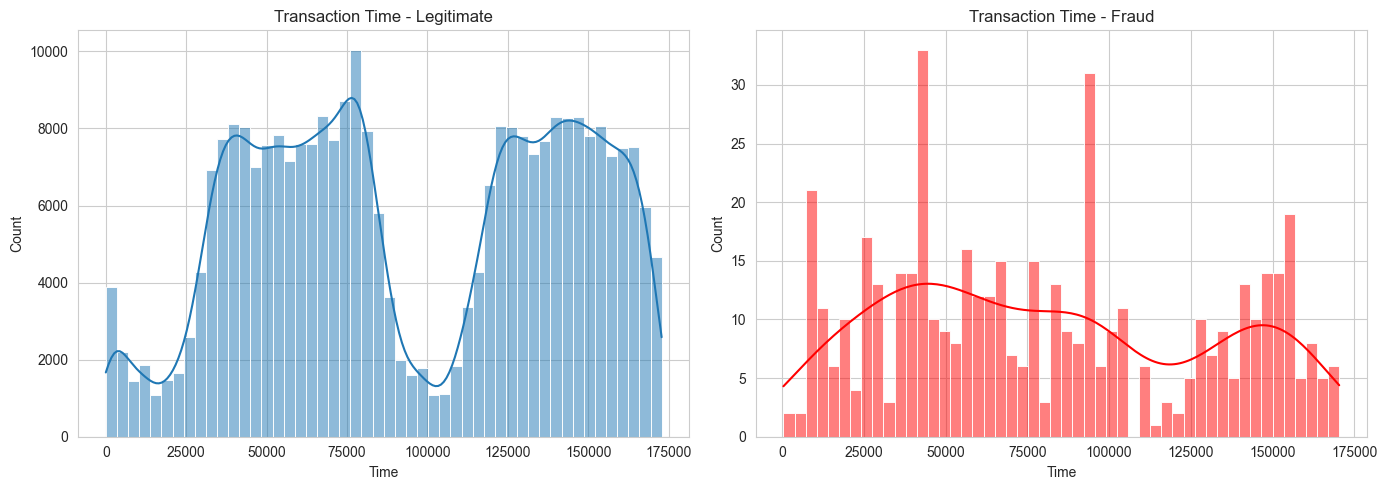

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].set_title("Transaction Time - Legitimate")
sns.histplot(df[df["Class"] == 0]["Time"], bins=50, ax=axes[0], kde=True)

axes[1].set_title("Transaction Time - Fraud")
sns.histplot(df[df["Class"] == 1]["Time"], bins=50, ax=axes[1], kde=True, color="red")

plt.tight_layout()
plt.show()

**Legitimate Transaction**: The graph clearly show a bimodal distribution with 2 peaks, there is a dip around ~2000 and there is a dip around ~110000. For the time feature the start as 0 secs however it gives us no idea about the time of the day the 0th sec corresponds to. The only inference we can have is by looking at the transaction volumes from the data and have a rough estimation. Usually people will transact mostly during the day and the no of transactions will significantly reduce at the night.

plt.figure(figsize=(18, 14))
sns.heatmap(df.select_dtypes(include="number").corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

**Conclusion:**
- Frauds can happen at any time of the day
- The potential for frauds are higher at nightime.
- The conclusion that we have derived here depends on time of the day as an important factor hence we must use the time feature for the purpose of modelling.

In [24]:
df.drop('amount_bin', axis=1, inplace=True)

## 6. Correlation Heatmap

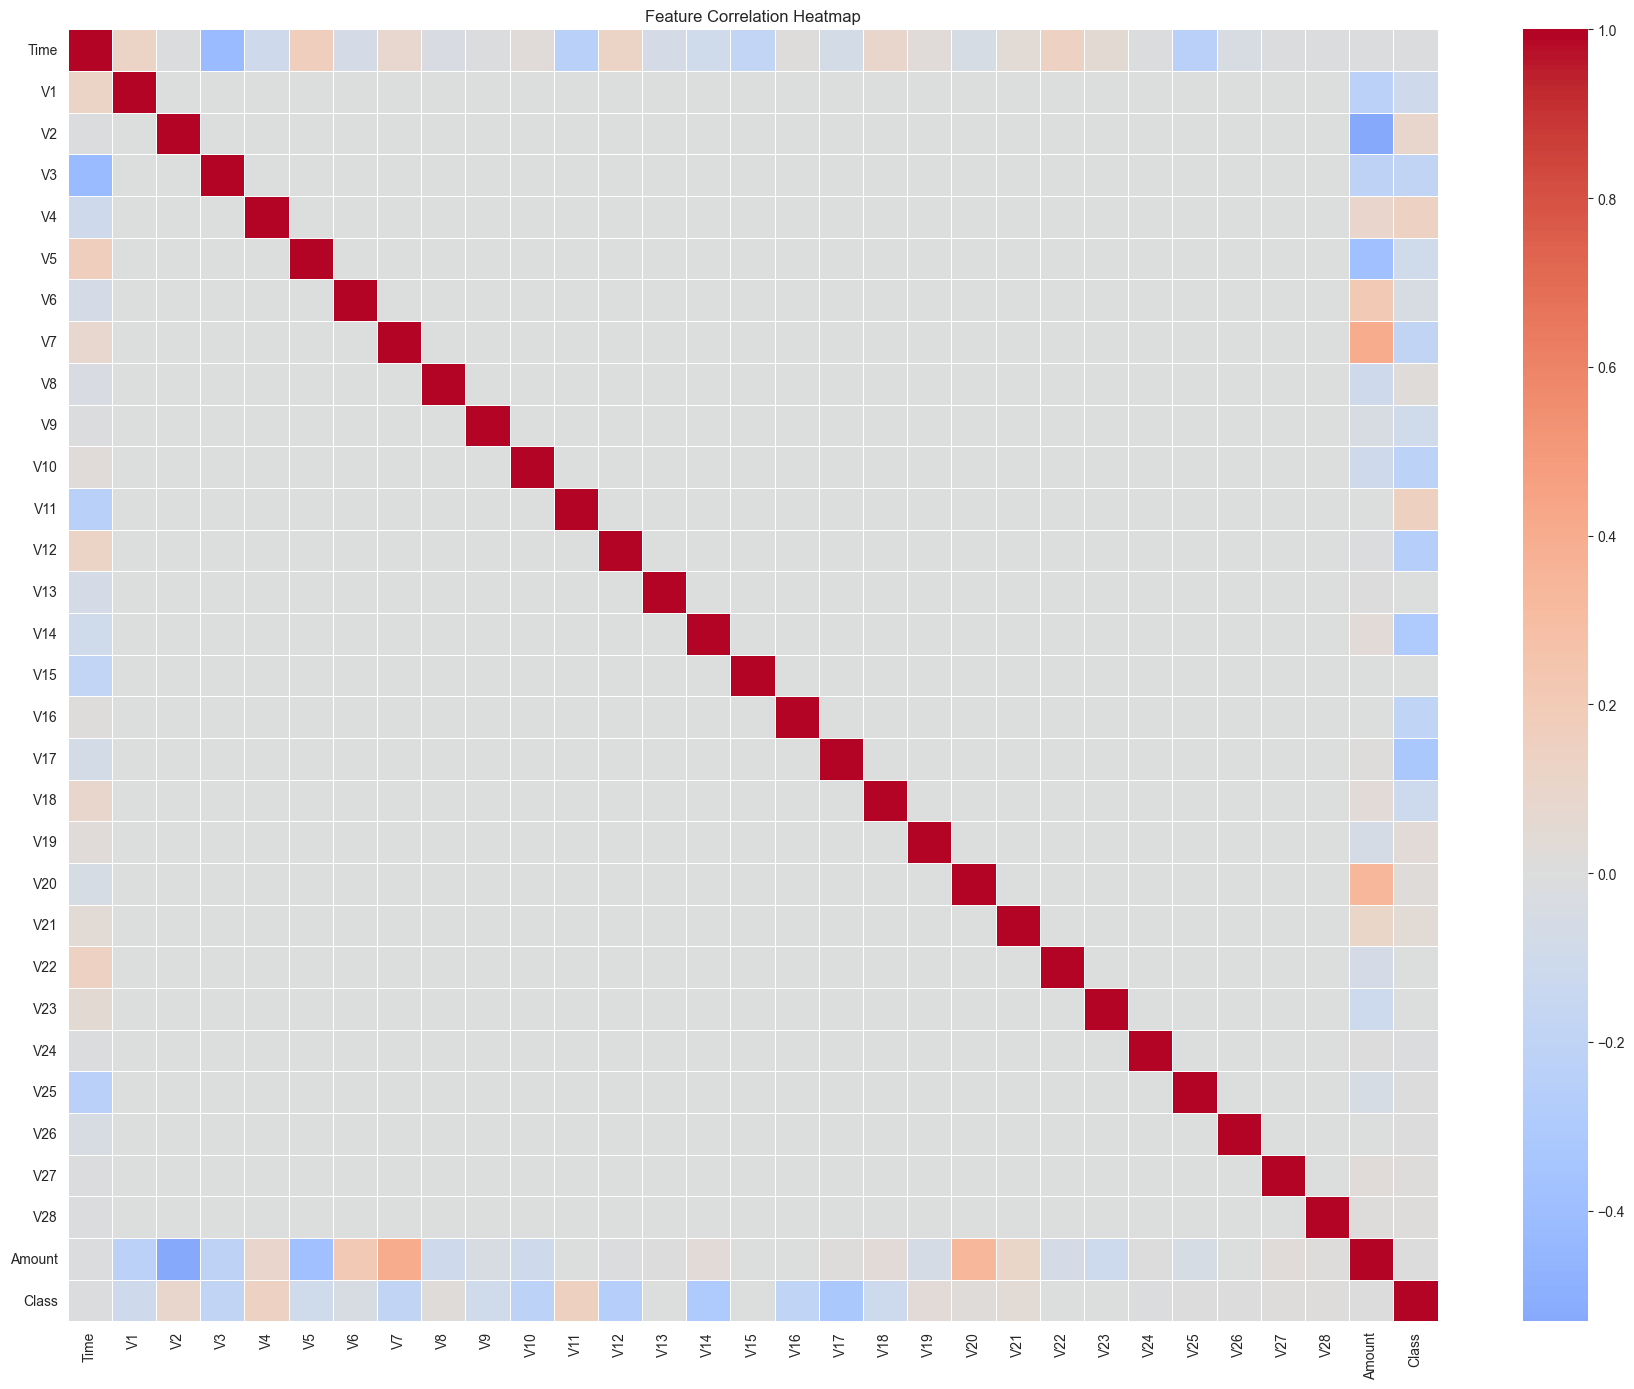

In [27]:
plt.figure(figsize=(18, 14))
df.select_dtypes(include="number")
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

Most of the cells are light coloured showing no strong correlations

In [34]:
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)
print(correlations.head)

<bound method NDFrame.head of V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64>


In [33]:
# Features most correlated with Class indicating fraud
# Top features correlated with fraud
correlations = df.corr()['Class'].drop('Class').sort_values(ascending=False)
print(correlations.head(10))
print(correlations.tail(10))


V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


**Top Positive Correlations:**

| Feature | Correlation | Interpretation |
|---|---|---|
| V11 | 0.154876 | Strong Positive correlation among all the features, when V11 increases the fraud is likely to be more. |
| V4 | 0.133447 | 2nd strongest correlation |
| V2 | 0.091289 | Moderate |

**Top Negative Correlations:**

| Feature | Correlation | Interpretation |
|---|---|---|
| V17 | -0.326481 | Strong Negative correlation among all the features, when V17 value is less the fraud is likely to be more. |
| V14 | -0.302544 | 2nd strongest negative correlation |
| V12 | -0.260593 | 3rd strongest negative correlation |

If we compare the absolute values of the correlations the we find that the negatively correlated features are the best indicators of fraud than the positively correlated features.
</br>
If we take amount vs fraud the correlation of 0.005632, very minuscule, so we can safely conclude that the they are uncorrelated.


Roughly speaking these all features are correlated more and hence must add more predictive value to the model. These features are: V17, V11, V12, V10, V16, V3, V16, V16, V3, V7, V11, V4, V2

## 7. Feature Distribution by Class

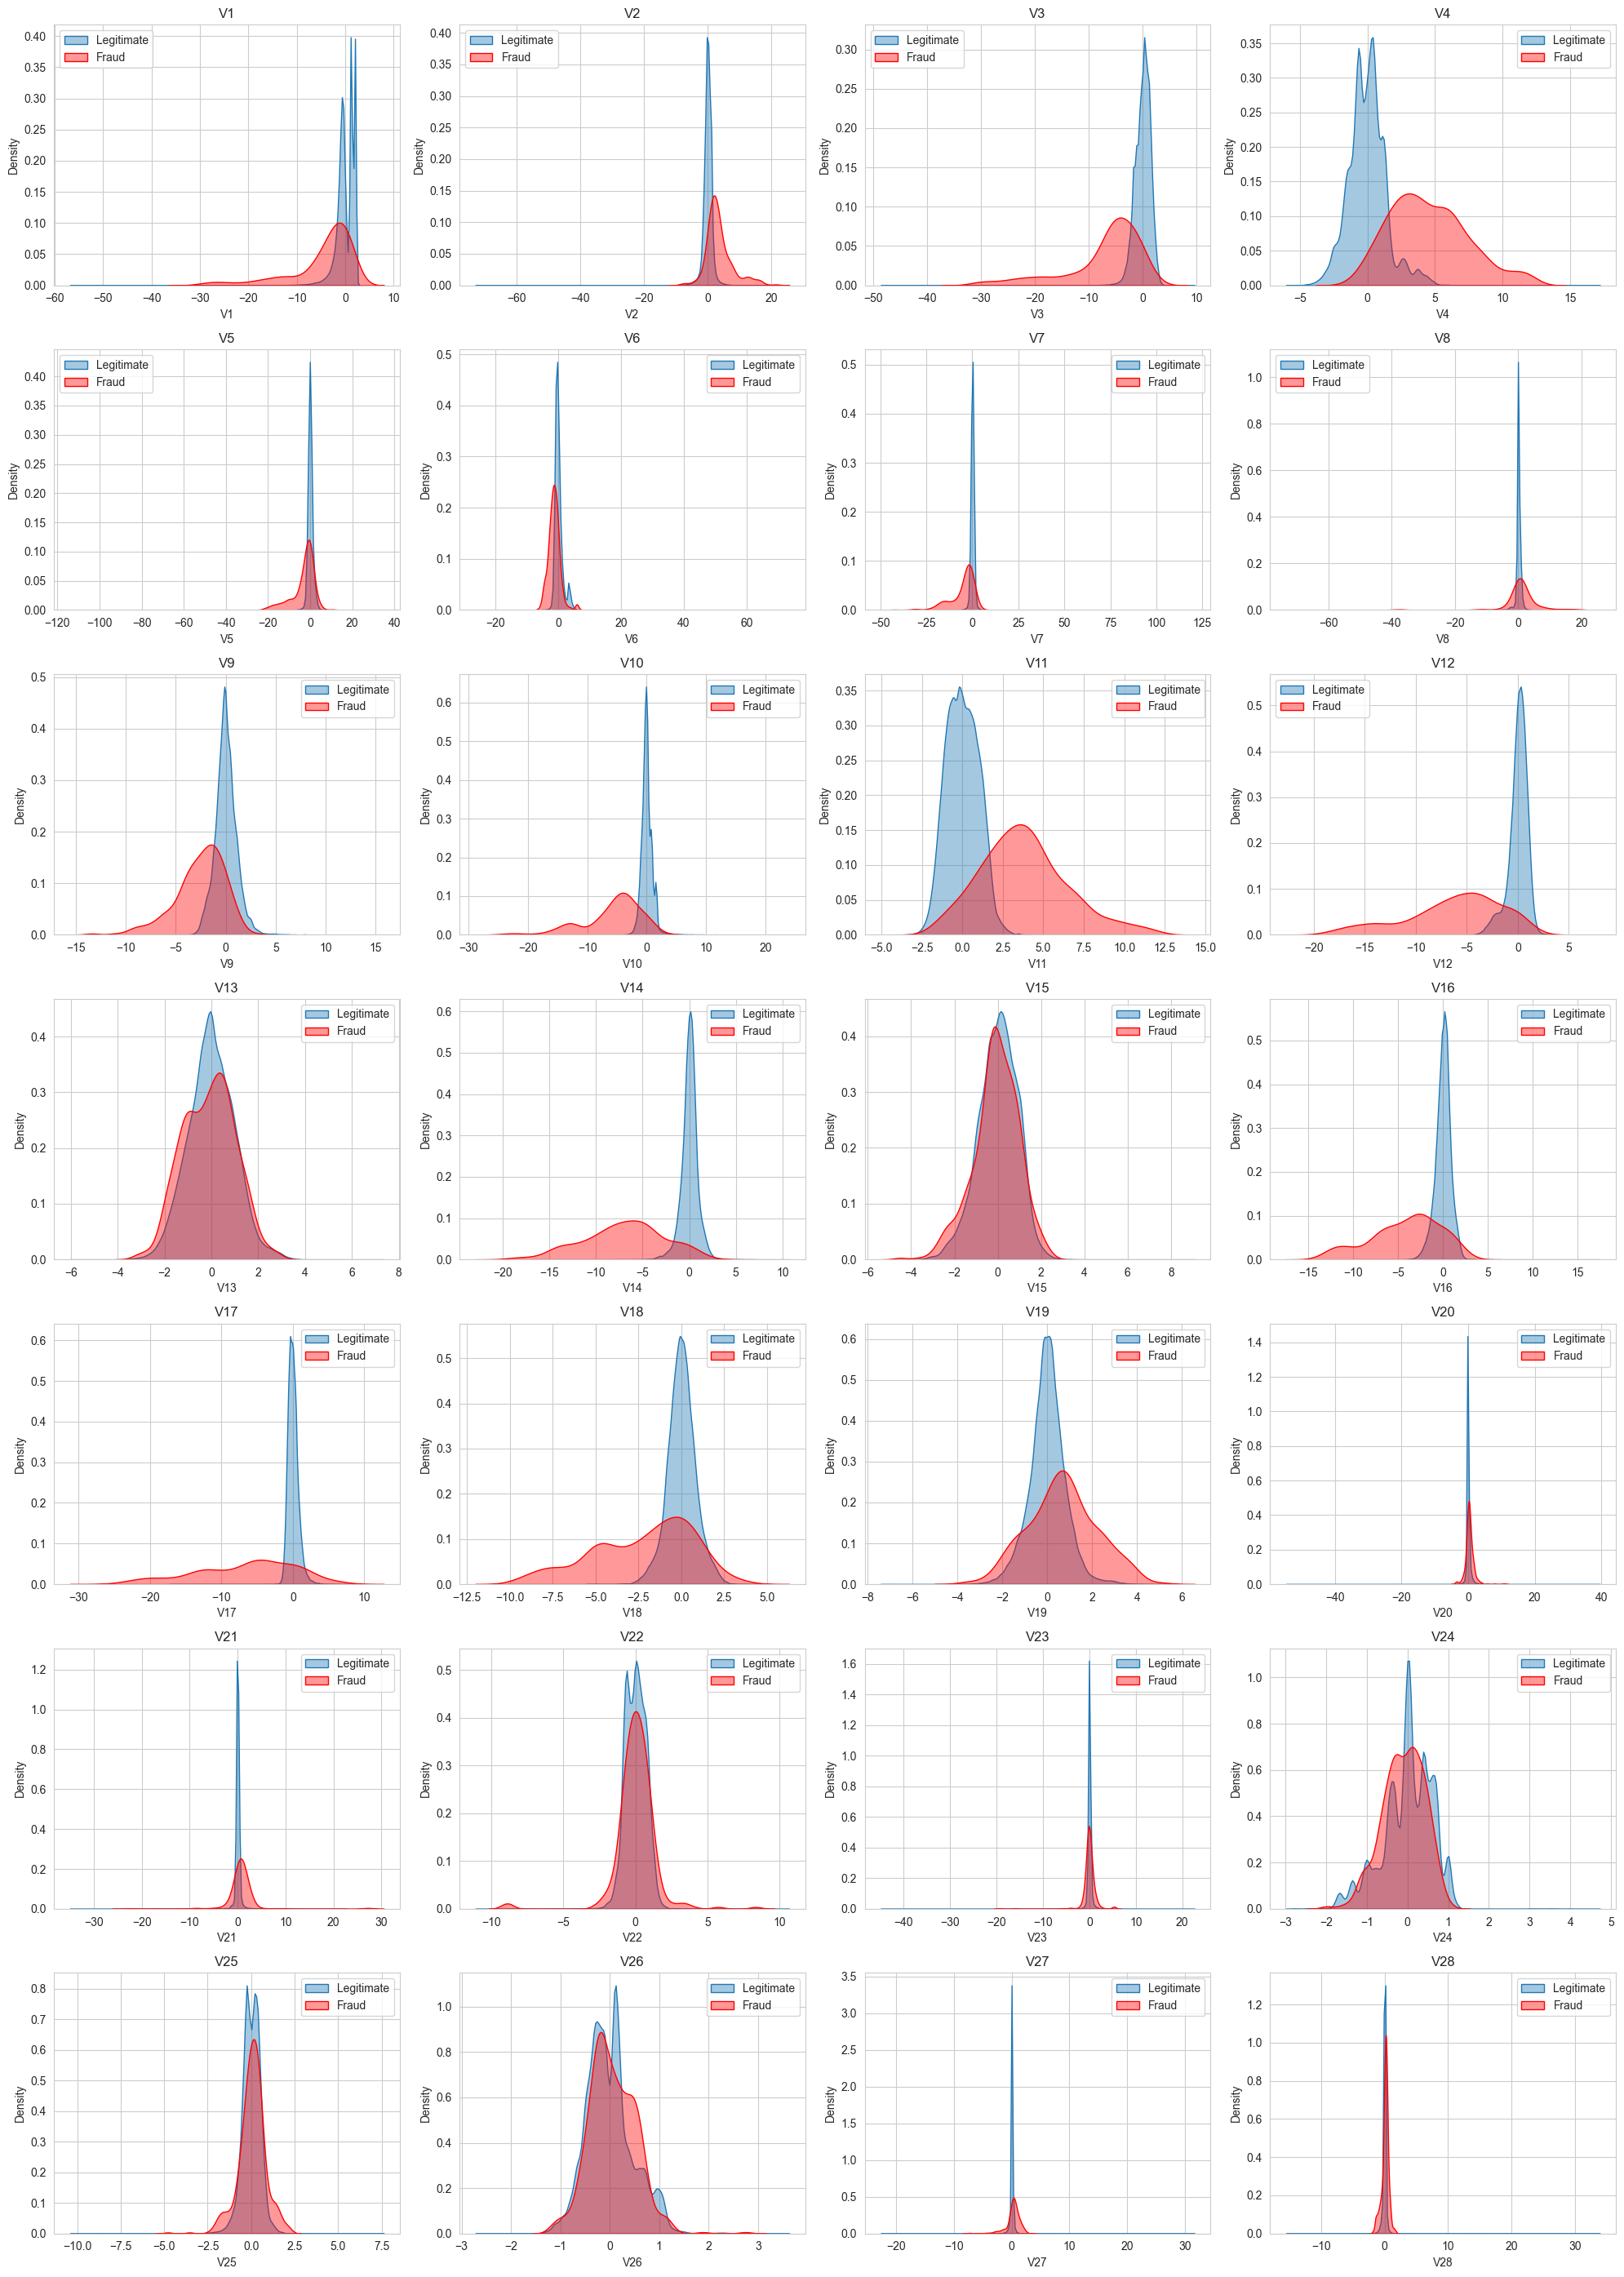

In [4]:
v_features = [col for col in df.columns if col.startswith("V")]

fig, axes = plt.subplots(7, 4, figsize=(20, 28))
axes = axes.ravel()

for i, col in enumerate(v_features):
    sns.kdeplot(df[df["Class"] == 0][col], ax=axes[i], label="Legitimate", fill=True, alpha=0.4)
    sns.kdeplot(df[df["Class"] == 1][col], ax=axes[i], label="Fraud", fill=True, alpha=0.4, color="red")
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
# Difference in means between Fraud and Legitimate for each V-feature
v_features = [col for col in df.columns if col.startswith("V")]

fraud_mean = df[df["Class"] == 1][v_features].mean()
legit_mean = df[df["Class"] == 0][v_features].mean()

for feat in v_features:
    diff = fraud_mean[feat] - legit_mean[feat]
    print(f"Feature {feat}: Difference in means = {diff}")

Feature V1: Difference in means = -4.7802061789646455
Feature V2: Difference in means = 3.6300489593980876
Feature V3: Difference in means = -7.045451965628404
Feature V4: Difference in means = 4.549888972243557
Feature V5: Difference in means = -3.1566780018246523
Feature V6: Difference in means = -1.4001554590284588
Feature V7: Difference in means = -5.578367633672223
Feature V8: Difference in means = 0.5716233664479029
Feature V9: Difference in means = -2.585589490394331
Feature V10: Difference in means = -5.686706574086657
Feature V11: Difference in means = 3.8067490155984287
Feature V12: Difference in means = -6.270224759362687
Feature V13: Difference in means = -0.10952301652004538
Feature V14: Difference in means = -6.98378728629198
Feature V15: Difference in means = -0.09308955778552516
Feature V16: Difference in means = -4.147109771631907
Feature V17: Difference in means = -6.677371462701792
Feature V18: Difference in means = -2.250195314042504
Feature V19: Difference in means

### Tier 1 — Strong Separators (clearly different distributions)

| Feature | Correlation | Mean Shifted By | Fraud Distribution Pattern |
|---|---|---|---|
| V17 | -0.3265 | -6.6774 | Fraud shifts heavily left (negative). Strongest separator overall. |
| V14 | -0.3025 | -6.9838 | Fraud shifts heavily left. Very clear separation. |
| V12 | -0.2606 | -6.2702 | Fraud distribution shifted left with wider spread. |
| V10 | -0.2169 | -5.6867 | Fraud shifted left, good separation. |
| V16 | -0.1965 | -4.1471 | Fraud shifted left with a wider, flatter distribution. |
| V3 | -0.1930 | -7.0455 | Fraud has a long left tail, good separation. Largest mean shift. |
| V7 | -0.1873 | -5.5784 | Fraud shifted left significantly. |

### Tier 2 — Moderate Separators

| Feature | Correlation | Mean Shifted By | Fraud Distribution Pattern |
|---|---|---|---|
| V11 | +0.1549 | +3.8067 | Fraud shifts right (positive). Strongest positive predictor. |
| V4 | +0.1335 | +4.5499 | Fraud shifts right with wider spread. |
| V18 | -0.1115 | -2.2502 | Fraud slightly shifted left. Moderate separation. |
| V1 | -0.1013 | -4.7802 | Fraud shifted left with subtle separation. |
| V9 | -0.0977 | -2.5856 | Fraud slightly shifted left with mild separation. |
| V5 | -0.0950 | -3.1567 | Fraud shifted left. Moderate overlap. |
| V2 | +0.0913 | +3.6300 | Fraud shifts right. Moderate separation. |

### Tier 3 — Weak/No Separation (overlapping distributions)

| Feature | Correlation | Mean Shifted By | Fraud Distribution Pattern |
|---|---|---|---|
| V6 | -0.0436 | -1.4002 | Very slight left shift. Weak predictor. |
| V21 | +0.0404 | +0.7148 | Very slight right shift. Nearly overlapping distributions. |
| V19 | +0.0348 | +0.6818 | Minimal separation. Distributions almost identical. |
| V20 | +0.0201 | +0.3730 | Negligible shift. Not a useful separator. |
| V8 | +0.0199 | +0.5716 | Nearly identical distributions for fraud and legitimate. |
| V27 | +0.0176 | +0.1709 | Negligible separation. |
| V28 | +0.0095 | +0.0758 | No meaningful separation. |
| V25 | +0.0033 | +0.0415 | Distributions overlap completely. |
| V26 | +0.0045 | +0.0517 | Distributions overlap completely. |
| V22 | +0.0008 | +0.0141 | Distributions overlap completely. |
| V23 | -0.0027 | -0.0404 | Distributions overlap completely. |
| V24 | -0.0072 | -0.1053 | Distributions overlap completely. |
| V13 | -0.0046 | -0.1095 | Distributions overlap completely. |
| V15 | -0.0042 | -0.0931 | Distributions overlap completely. |

## 8. Scale Unscaled Features (Time & Amount)

V1-V28 are already scaled via PCA. Only `Time` and `Amount` need standardization.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Scaled_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Scaled_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

# Drop original unscaled columns
df.drop(["Time", "Amount"], axis=1, inplace=True)

print("After scaling:")
print(f"  Scaled_Amount -> mean: {df['Scaled_Amount'].mean():.4f}, std: {df['Scaled_Amount'].std():.4f}")
print(f"  Scaled_Time   -> mean: {df['Scaled_Time'].mean():.4f}, std: {df['Scaled_Time'].std():.4f}")
df.head()

After scaling:
  Scaled_Amount -> mean: -0.0000, std: 1.0000
  Scaled_Time   -> mean: -0.0000, std: 1.0000


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount,Scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## 9. Outlier Detection

We use two methods to detect outliers:
- **IQR (Interquartile Range):** Outliers fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
- **Z-Score:** Outliers have |z| > 3 (more than 3 standard deviations from mean)

In [11]:
from scipy import stats

features = [col for col in df.columns if col not in ["Class"]]

# --- IQR Method ---
iqr_outlier_counts = {}
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outlier_counts[col] = len(outliers)

# --- Z-Score Method ---
zscore_outlier_counts = {}
for col in features:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > 3]
    zscore_outlier_counts[col] = len(outliers)

# Combine into a summary DataFrame
outlier_summary = pd.DataFrame({
    "Feature": features,
    "IQR_Outliers": [iqr_outlier_counts[col] for col in features],
    "IQR_Outlier_%": [round(iqr_outlier_counts[col] / len(df) * 100, 2) for col in features],
    "ZScore_Outliers": [zscore_outlier_counts[col] for col in features],
    "ZScore_Outlier_%": [round(zscore_outlier_counts[col] / len(df) * 100, 2) for col in features],
})

outlier_summary = outlier_summary.sort_values("IQR_Outliers", ascending=False).reset_index(drop=True)

print("Outlier Summary (All Features)")
print("=" * 70)
outlier_summary

Outlier Summary (All Features)


,Feature,IQR_Outliers,IQR_Outlier_%,ZScore_Outliers,ZScore_Outlier_%
0,V27,39163,13.75,4771,1.68
1,Scaled_Amount,31904,11.20,4076,1.43
2,V28,30342,10.65,3264,1.15
3,V20,27770,9.75,4645,1.63
4,V8,24134,8.47,4221,1.48
5,V6,22965,8.06,4652,1.63
6,V23,18541,6.51,3364,1.18
7,V12,15348,5.39,3393,1.19
8,V21,14497,5.09,4064,1.43
9,V14,14149,4.97,3380,1.19


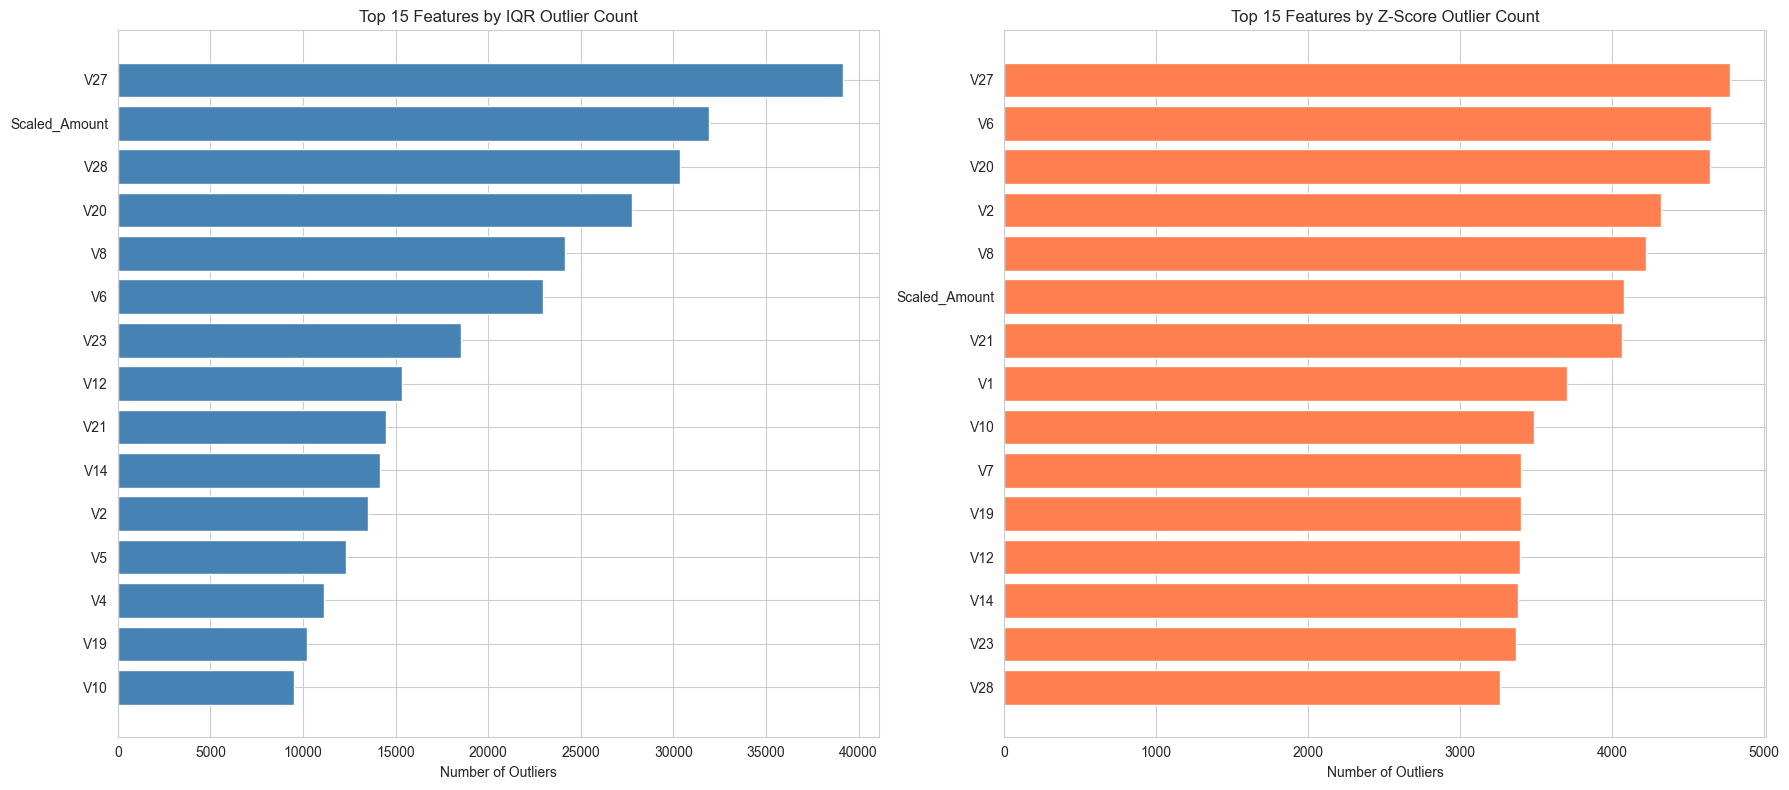

In [12]:
# Visualize outlier counts: IQR vs Z-Score comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

top_iqr = outlier_summary.head(15)
axes[0].barh(top_iqr["Feature"], top_iqr["IQR_Outliers"], color="steelblue")
axes[0].set_title("Top 15 Features by IQR Outlier Count")
axes[0].set_xlabel("Number of Outliers")
axes[0].invert_yaxis()

top_zscore = outlier_summary.sort_values("ZScore_Outliers", ascending=False).head(15)
axes[1].barh(top_zscore["Feature"], top_zscore["ZScore_Outliers"], color="coral")
axes[1].set_title("Top 15 Features by Z-Score Outlier Count")
axes[1].set_xlabel("Number of Outliers")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_49290/2479132819.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_49290/2479132819.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_49290/2479132819.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_49290/2479132819.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

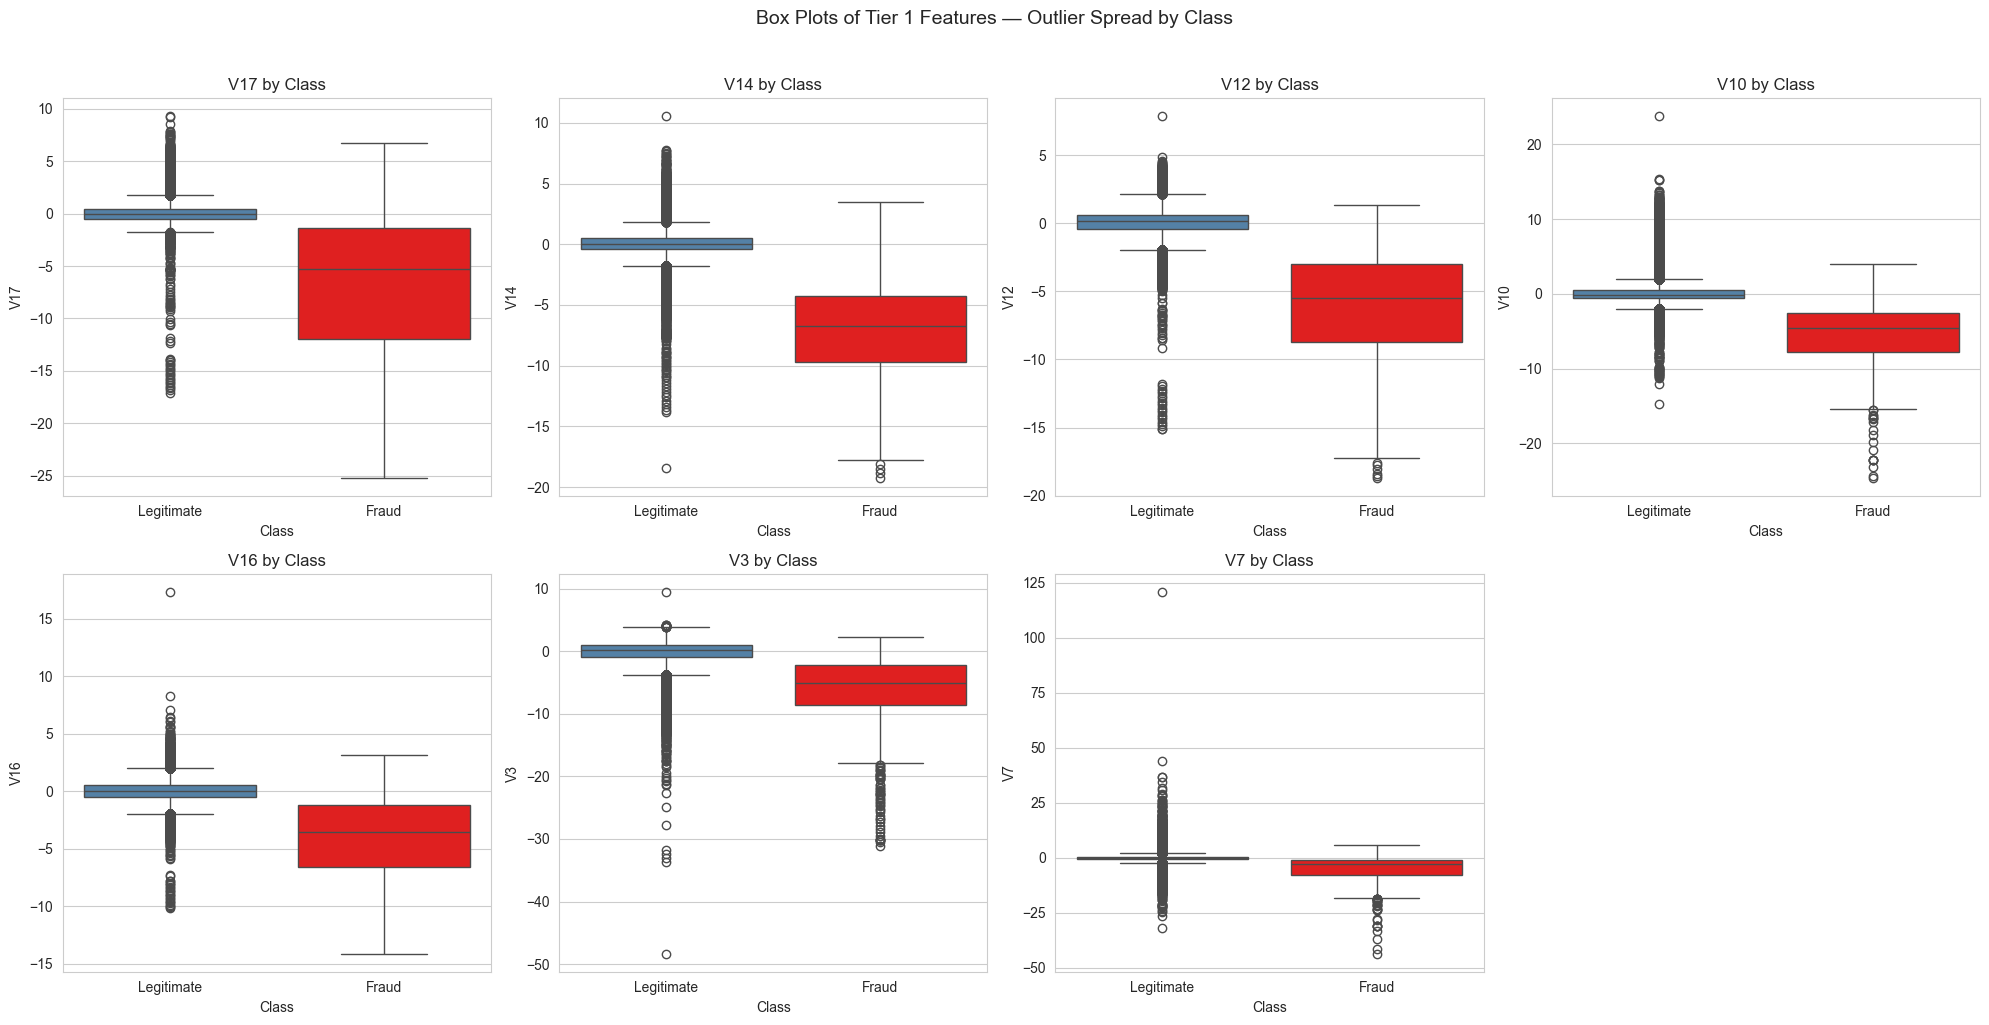

In [13]:
# Box plots for Tier 1 features — Outlier spread by Class
tier1_features = ["V17", "V14", "V12", "V10", "V16", "V3", "V7"]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(tier1_features):
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i], hue="Class", palette={0: "steelblue", 1: "red"}, legend=False)
    axes[i].set_title(f"{col} by Class")
    axes[i].set_xticklabels(["Legitimate", "Fraud"])

axes[-1].axis("off")
plt.suptitle("Box Plots of Tier 1 Features — Outlier Spread by Class", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/1588082501.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/1588082501.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/1588082501.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/1588082501.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].s

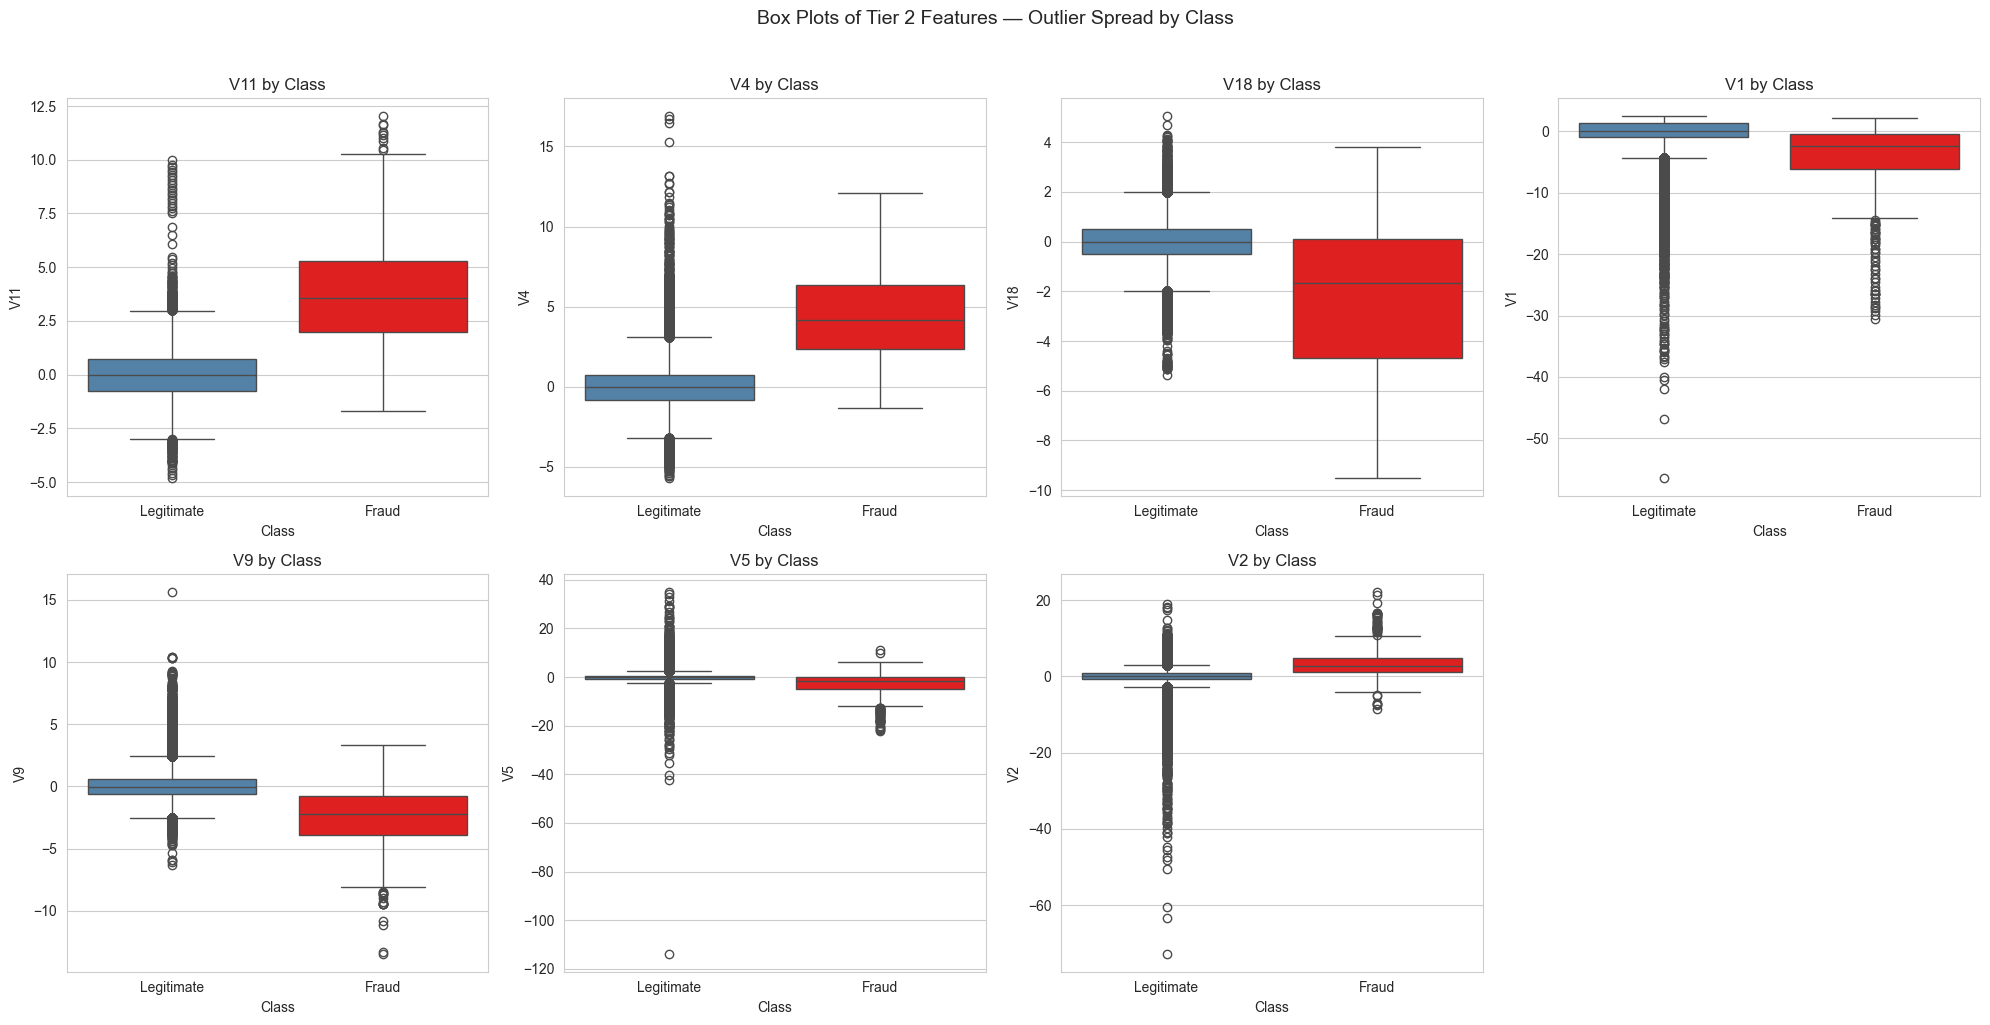

In [5]:
# Box plots for Tier 2 features — Outlier spread by Class
tier2_features = ["V11", "V4", "V18", "V1", "V9", "V5", "V2"]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(tier2_features):
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i], hue="Class", palette={0: "steelblue", 1: "red"}, legend=False)
    axes[i].set_title(f"{col} by Class")
    axes[i].set_xticklabels(["Legitimate", "Fraud"])

axes[-1].axis("off")
plt.suptitle("Box Plots of Tier 2 Features — Outlier Spread by Class", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/28753755.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/28753755.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/28753755.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["Legitimate", "Fraud"])
/var/folders/4s/z0hcx0pj2cn4rpt0g7sn00pr0000gp/T/ipykernel_965/28753755.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtick

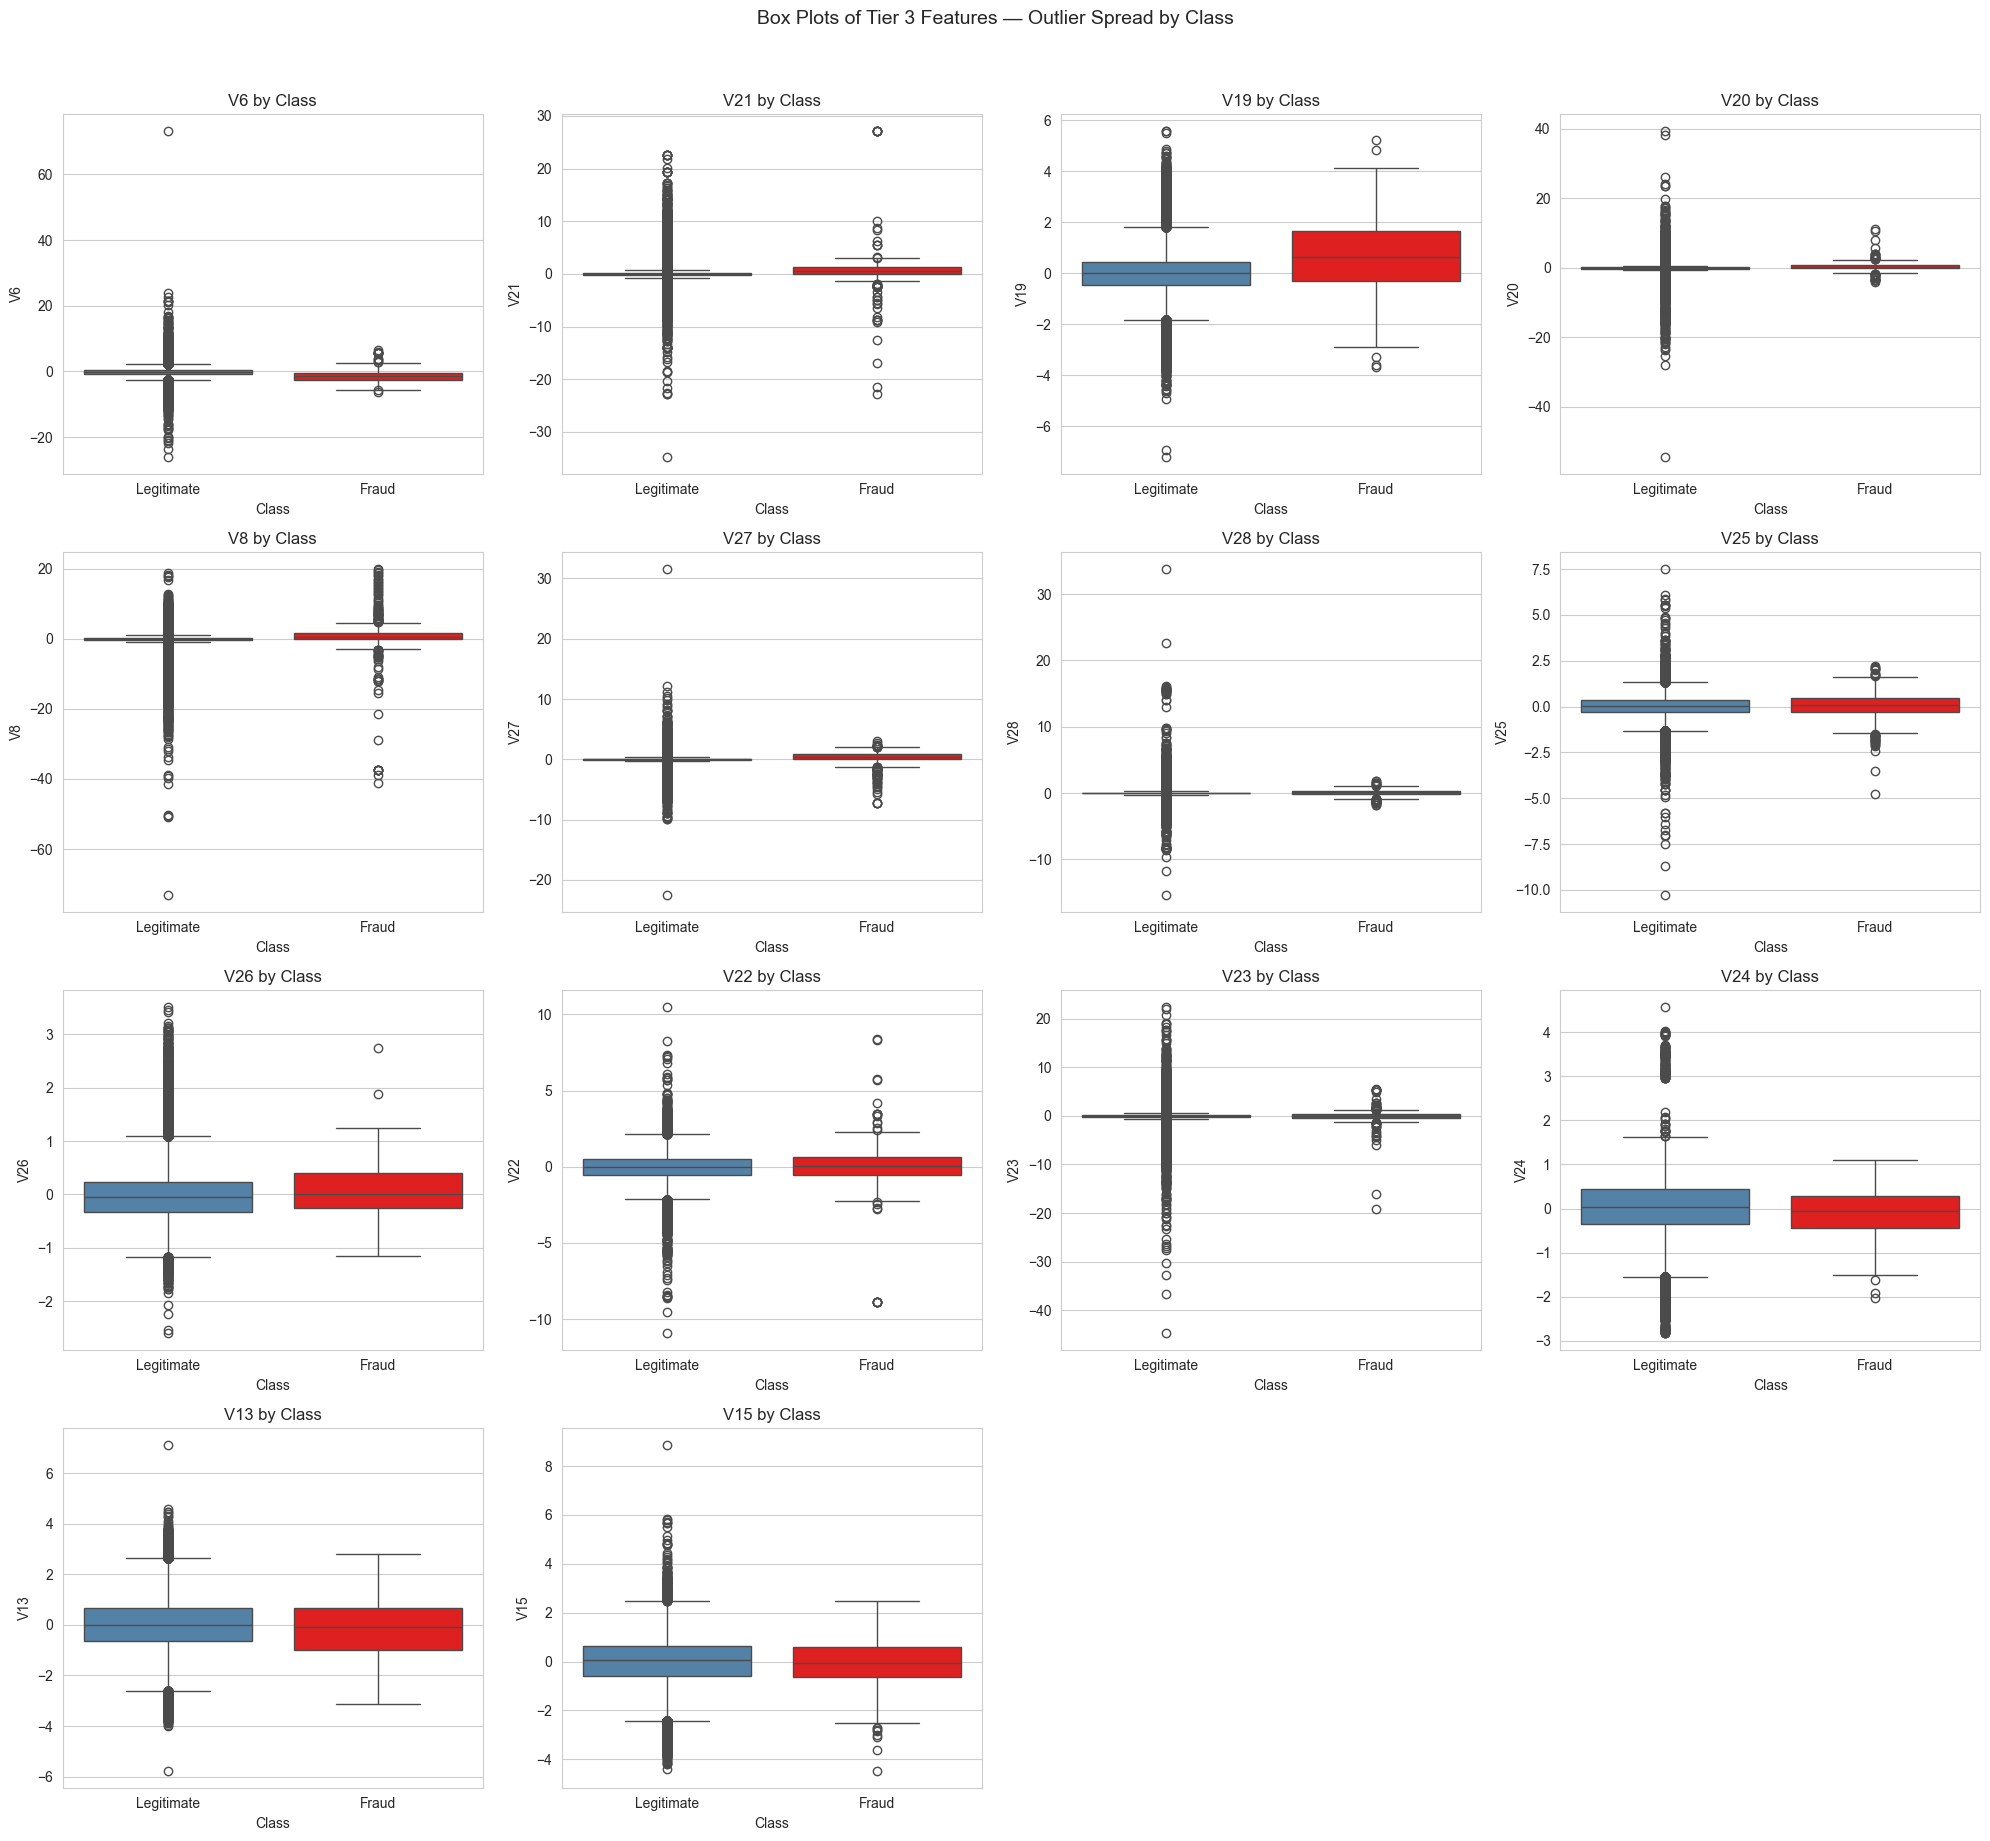

In [6]:
# Box plots for Tier 3 features — Outlier spread by Class
tier3_features = ["V6", "V21", "V19", "V20", "V8", "V27", "V28", "V25", "V26", "V22", "V23", "V24", "V13", "V15"]

fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.ravel()

for i, col in enumerate(tier3_features):
    sns.boxplot(x="Class", y=col, data=df, ax=axes[i], hue="Class", palette={0: "steelblue", 1: "red"}, legend=False)
    axes[i].set_title(f"{col} by Class")
    axes[i].set_xticklabels(["Legitimate", "Fraud"])

for j in range(len(tier3_features), len(axes)):
    axes[j].axis("off")

plt.suptitle("Box Plots of Tier 3 Features — Outlier Spread by Class", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()